In [238]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from tqdm.notebook import tqdm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import seaborn as sn
import pandas as pd

from IPython import embed

import os
import pickle

from tabulate import tabulate

%matplotlib inline

In [152]:
def class_matrix(cf, x):
    
    column_sums = np.sum(cf, axis=0)
    row_sums = np.sum(cf, axis=1)
    total_vals = np.sum(row_sums)

    TP = cf[x,x]
    FP = np.sum(cf[x]) - TP
    FN = column_sums[x] - TP
    TN = total_vals - row_sums[x] - column_sums[x] + TP
    
    return np.asarray([[TP, FP], [FN, TN]])

#harmonic mean of precision and sensitivity
def f1_score(matrix):
    TP = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TN = matrix[1][1]
    
    return (2 * TP) / (2 * TP + FP + FN + 1e-3)

#
def accuracy_score(matrix):
    TP = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TN = matrix[1][1]
    
    return (TP + TN) / (TP + TN + FP + FN + 1e-3)

# the ability of the classifier to find all the positive samples
def recall_score(matrix):
    TP = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TN = matrix[1][1]
    
    return TP / (TP + FN + 1e-3)

# the ability of the classifier to not label as positive a sample that is negative
def precision_score(matrix):
    TP = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TN = matrix[1][1]
    
    return TP / (TP + FP + 1e-3)

In [162]:
def plot_cfmat(cf_matrix, num_classes, title):
    
    df_cm = pd.DataFrame(cf_matrix, index = [i for i in range(num_classes)], columns = [i for i in range(num_classes)])
    
    plt.figure(figsize=(12,7))
    plt.title(title, fontsize=20)
    sn.heatmap(df_cm, annot = True, annot_kws={"fontsize":16}, fmt = ".0f", cmap ="Blues")
    
def agg_matrix_fn(all_matrices):
    
    total = np.zeros(all_matrices[0].shape)
    for i, matrix in enumerate(all_matrices):
        total = total + matrix
    
    return (total / (i + 1)).astype(int)

def plot_metric(data, metric, title):
    
    num_epochs = len(data)
    epochs = list(range(num_epochs))
    
    #plt.style.use("seaborn")
    fig, ax = plt.subplots(figsize = (8, 5))

    plt.plot(epochs, data, "-o", label = "label")
    
    plt.xlabel("Epochs", fontsize = 16)
    plt.title(title, fontsize=16)
    plt.ylabel(metric, fontsize = 16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    #plt.ylim([0, 1.05])

    #ax.legend(bbox_to_anchor=(2, 1), loc="upper left", borderaxespad=0, fontsize=16)
        
    fig.tight_layout()

Metric       Score
---------  -------
F1 Score     0.933
Accuracy     0.938
Recall       0.877
Precision    0.995


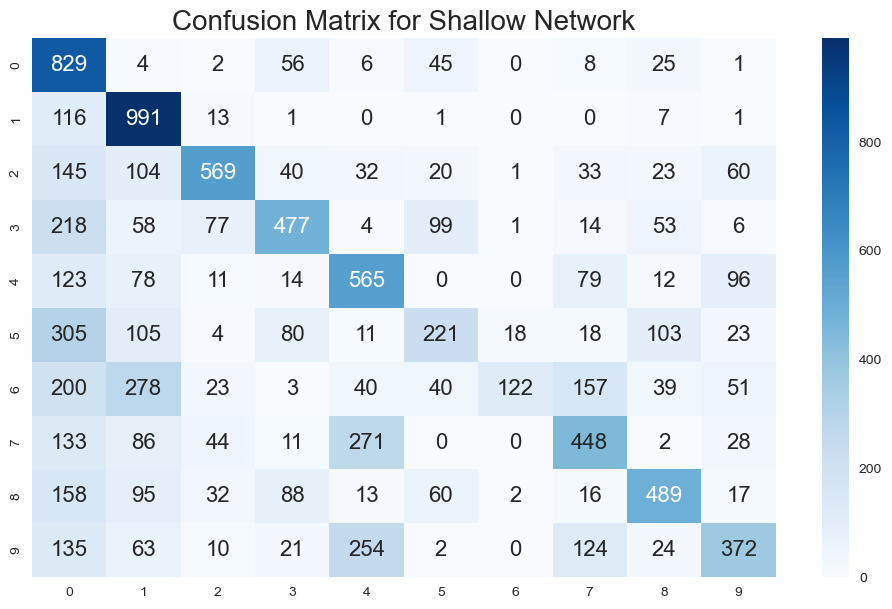

In [316]:
which_network = "MLP"
which_dataset = "mnist"

path = f"/Users/andyvarner/Documents/NN_Spring2023/project_1/results/{which_network}/{which_dataset}"
filename = os.path.join(path,"001.pkl")
results = pickle.load(open(filename,"rb"))

results.keys()

loss_1 = results["loss"]
cf_mat_1 = results["validation"]

# plot loss across experiment
#plot_metric(loss_1, "Loss", "Experiment 1, shallow network")

# plot a confusion matrix for a single epoch

#plot_cfmat(cf_mat_1[-1], 10, "Last validation test")

# aggregate confusion matrices across entire experiment

agg_matrix_1 = agg_matrix_fn(cf_mat_1)
plot_cfmat(agg_matrix_1,agg_matrix_1.shape[0], "Confusion Matrix for Shallow Network")

headers = ['Metric', 'Score']
data = [
    ["F1 Score", f1_score(agg_matrix_1).round(3)],
    ["Accuracy", accuracy_score(agg_matrix_1).round(3)],
    ["Recall", recall_score(agg_matrix_1).round(3)],
    ["Precision", precision_score(agg_matrix_1).round(3)]
]
print(tabulate(data, headers = headers, tablefmt="simple"))

In [169]:
# get other metrics

headers = ['Metric', 'Score']
data = [
    ["F1", f1_score(agg_matrix_1).round(3)],
    ["Accuracy", accuracy_score(agg_matrix_1).round(3)],
    ["Recall", recall_score(agg_matrix_1).round(3)],
    ["Precision", precision_score(agg_matrix_1).round(3)]
]
print(tabulate(data, headers=headers, tablefmt="pipe"))

| Metric    |   Score |
|:----------|--------:|
| F1        |   0.933 |
| Accuracy  |   0.938 |
| Recall    |   0.877 |
| Precision |   0.995 |


--------  -----
F1 Score  0.862
--------  -----


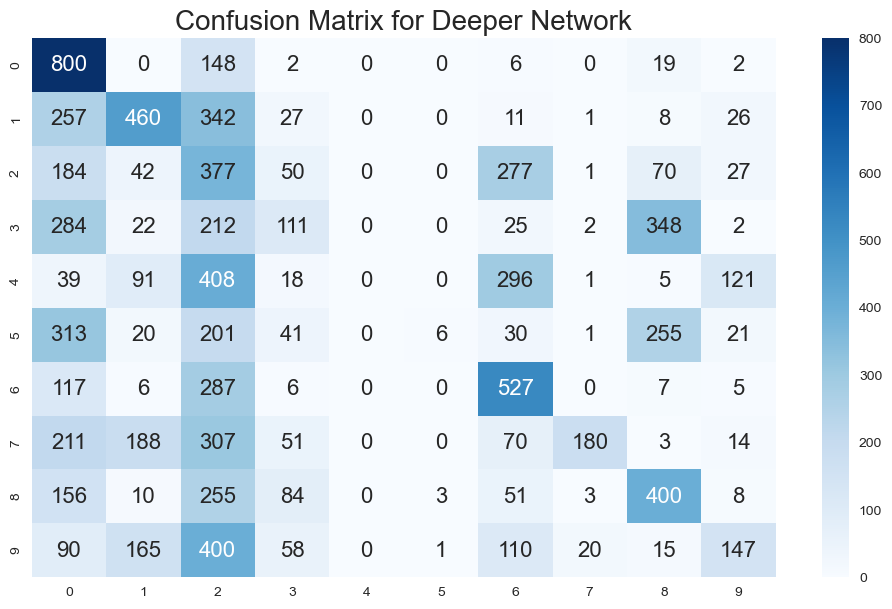

In [272]:
path = f"/Users/andyvarner/Documents/NN_Spring2023/project_1/results/{which_network}/{which_dataset}"
filename = os.path.join(path,"002.pkl")
results_2 = pickle.load(open(filename,"rb"))

loss_2 = results_2["loss"]
cf_mat_2 = results_2["validation"]

# plot loss across experiment
#plot_metric(loss, "Loss", "Experiment 2, deeper network")

# plot a confusion matrix for a single epoch

#plot_cfmat(cf_mat_2[-1], 10, "Last validation test")

# aggregate confusion matrices across entire experiment

agg_matrix_2 = agg_matrix_fn(cf_mat_2)
plot_cfmat(agg_matrix_2,agg_matrix_2.shape[0], "Confusion Matrix for Deeper Network")

# get other metrics

headers = ['Metric', 'Score']
data = [
    ["F1 Score", f1_score(agg_matrix_2).round(3)],
    #["Accuracy", accuracy_score(agg_matrix_2).round(3)],
    #["Recall", recall_score(agg_matrix_2).round(3)],
    #["Precision", precision_score(agg_matrix_2).round(3)]
]
print(tabulate(data, tablefmt="simple"))

--  -----
F1  0.981
--  -----


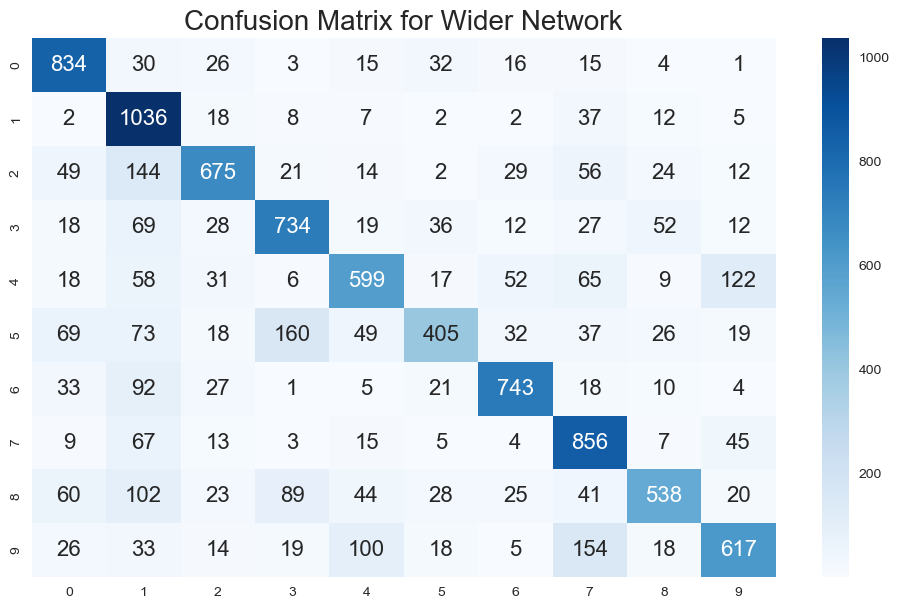

In [274]:
path = f"/Users/andyvarner/Documents/NN_Spring2023/project_1/results/{which_network}/{which_dataset}"
filename = os.path.join(path,"003.pkl")
results_3 = pickle.load(open(filename,"rb"))

loss_3 = results_3["loss"]
cf_mat_3 = results_3["validation"]

# plot loss across experiment
#plot_metric(loss_3, "Loss", "Experiment 3, wider network")

# plot a confusion matrix for a single epoch

#plot_cfmat(cf_mat_3[-1], 10, "Last validation test")

# aggregate confusion matrices across entire experiment

agg_matrix_3 = agg_matrix_fn(cf_mat_3)
plot_cfmat(agg_matrix_3,agg_matrix_3.shape[0], "Confusion Matrix for Wider Network")

# get other metrics

headers = ['Metric', 'Score']
data = [
    ["F1", f1_score(agg_matrix_3).round(3)],
    #["Accuracy", accuracy_score(agg_matrix_3).round(3)],
    #["Recall", recall_score(agg_matrix_3).round(3)],
    #["Precision", precision_score(agg_matrix_3).round(3)]
]
print(tabulate(data, tablefmt="simple"))

<IPython.core.display.Javascript object>


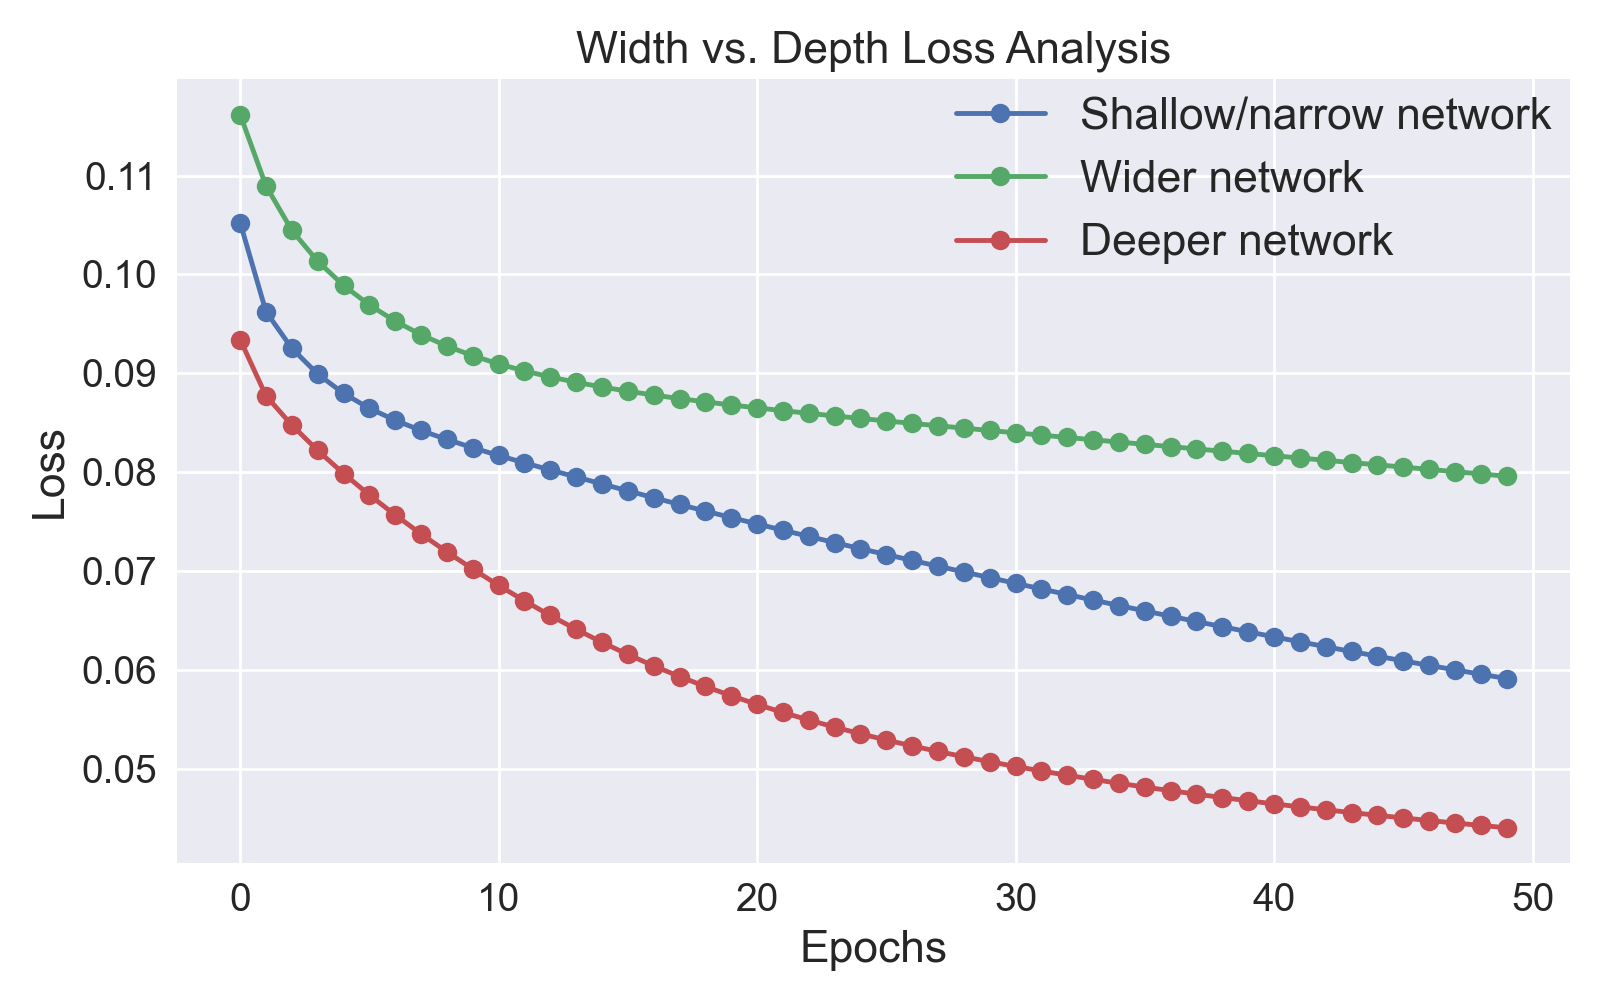

In [180]:
num_epochs = len(loss_1)
epochs = list(range(num_epochs))
epochs
#plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (8, 5))

plt.plot(epochs, loss_1, "-o", label = "Shallow/narrow network")
plt.plot(epochs, loss_2, "-o", label = "Wider network")
plt.plot(epochs, loss_3, "-o", label = "Deeper network")

plt.xlabel("Epochs", fontsize = 16)
plt.title("Width vs. Depth Loss Analysis", fontsize=16)
plt.ylabel("Loss", fontsize = 16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.ylim([0, 1.05])

ax.legend(loc="upper right", borderaxespad=0, fontsize=16)

fig.tight_layout()

In [185]:

# get other metrics
F1_list1, acc_list1, recall_list1, prec_list1 = [], [], [], []
for cf_mat in cf_mat_1:
    F1_list1.append(f1_score(cf_mat).round(3))
    acc_list1.append(accuracy_score(cf_mat).round(3))
    recall_list1.append(recall_score(cf_mat).round(3))
    prec_list1.append(precision_score(cf_mat).round(3))

F1_list2, acc_list2, recall_list2, prec_list2 = [], [], [], []
for cf_mat in cf_mat_2:
    F1_list2.append(f1_score(cf_mat).round(3))
    acc_list2.append(accuracy_score(cf_mat).round(3))
    recall_list2.append(recall_score(cf_mat).round(3))
    prec_list2.append(precision_score(cf_mat).round(3))

F1_list3, acc_list3, recall_list3, prec_list3 = [], [], [], []
for cf_mat in cf_mat_3:
    F1_list3.append(f1_score(cf_mat).round(3))
    acc_list3.append(accuracy_score(cf_mat).round(3))
    recall_list3.append(recall_score(cf_mat).round(3))
    prec_list3.append(precision_score(cf_mat).round(3))

10


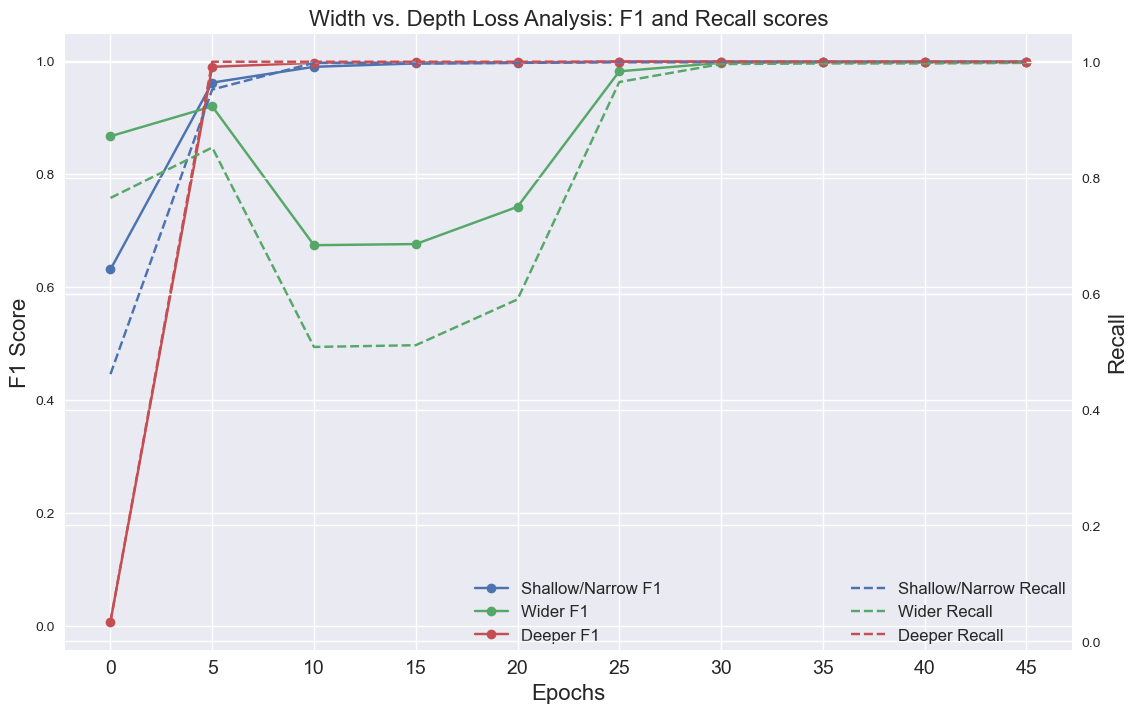

In [241]:
x_list_len = len(F1_list1)
x_list = list(range(x_list_len))
print(x_list_len)
#plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (13, 8))
ax2 = ax.twinx()
ax.plot(x_list, F1_list1, "-o", label = "Shallow/Narrow F1")
ax.plot(x_list, F1_list2, "-o", label = "Wider F1")
ax.plot(x_list, F1_list3, "-o", label = "Deeper F1")

ax.set_xlabel("Epochs", fontsize = 16)
plt.title("Width vs. Depth Loss Analysis: F1 and Recall scores", fontsize=16)
ax.set_ylabel("F1 Score", fontsize = 16)

x_labels = ['0','5','10','15','20', '25', '30', '35', '40', '45']
ax.set_xticks(range(x_list_len), x_labels,fontsize=14)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)


ax2.plot(x_list, recall_list1, "--", label = "Shallow/Narrow Recall")
ax2.plot(x_list, recall_list2, "--", label = "Wider Recall")
ax2.plot(x_list, recall_list3, "--", label = "Deeper Recall")
ax2.set_ylabel("Recall", fontsize = 16)
ax2.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
#ax2.ylim([0, 1.05])

ax.legend(loc="lower center", borderaxespad=0, fontsize=12)
ax2.legend(loc='lower right', borderaxespad=0, fontsize=12)

10


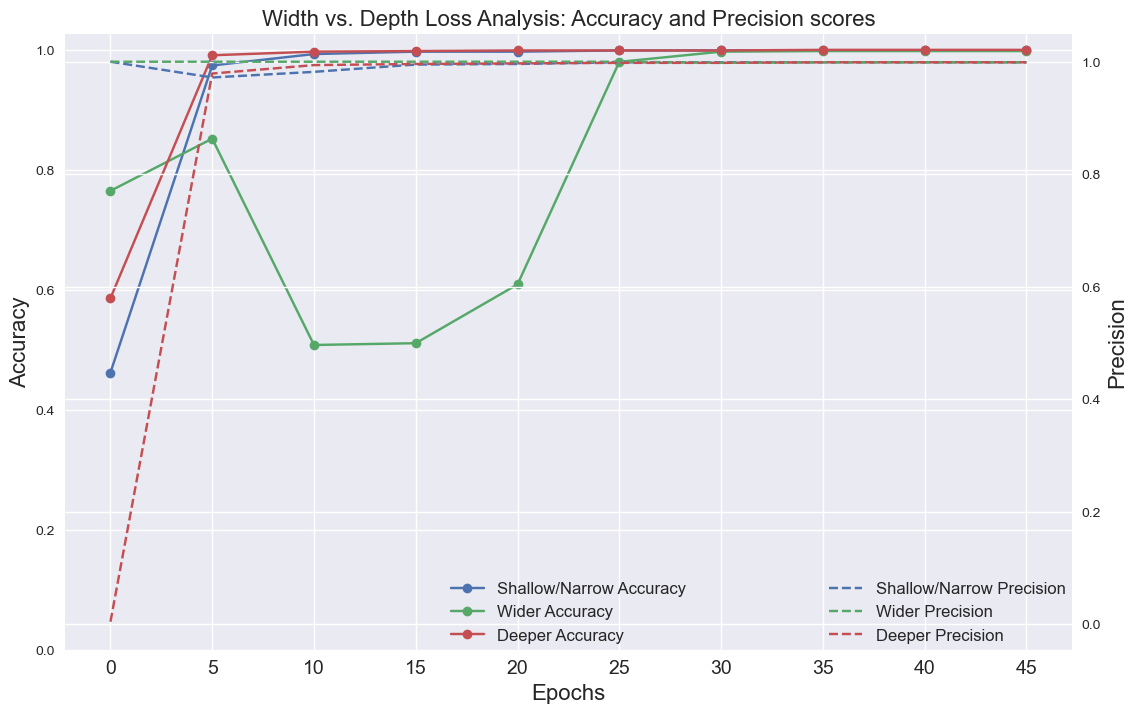

In [242]:
x_list_len = len(F1_list1)
x_list = list(range(x_list_len))
print(x_list_len)
#plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (13, 8))
ax2 = ax.twinx()
ax.plot(x_list, acc_list1, "-o", label = "Shallow/Narrow Accuracy")
ax.plot(x_list, acc_list2, "-o", label = "Wider Accuracy")
ax.plot(x_list, acc_list3, "-o", label = "Deeper Accuracy")

ax.set_xlabel("Epochs", fontsize = 16)
plt.title("Width vs. Depth Loss Analysis: Accuracy and Precision scores", fontsize=16)
ax.set_ylabel("Accuracy", fontsize = 16)

x_labels = ['0','5','10','15','20', '25', '30', '35', '40', '45']
ax.set_xticks(range(x_list_len), x_labels,fontsize=14)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)


ax2.plot(x_list, prec_list1, "--", label = "Shallow/Narrow Precision")
ax2.plot(x_list, prec_list2, "--", label = "Wider Precision")
ax2.plot(x_list, prec_list3, "--", label = "Deeper Precision")
ax2.set_ylabel("Precision", fontsize = 16)
ax2.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
#ax2.ylim([0, 1.05])

ax.legend(loc="lower center", borderaxespad=0, fontsize=12)
ax2.legend(loc='lower right', borderaxespad=0, fontsize=12)

<IPython.core.display.Javascript object>


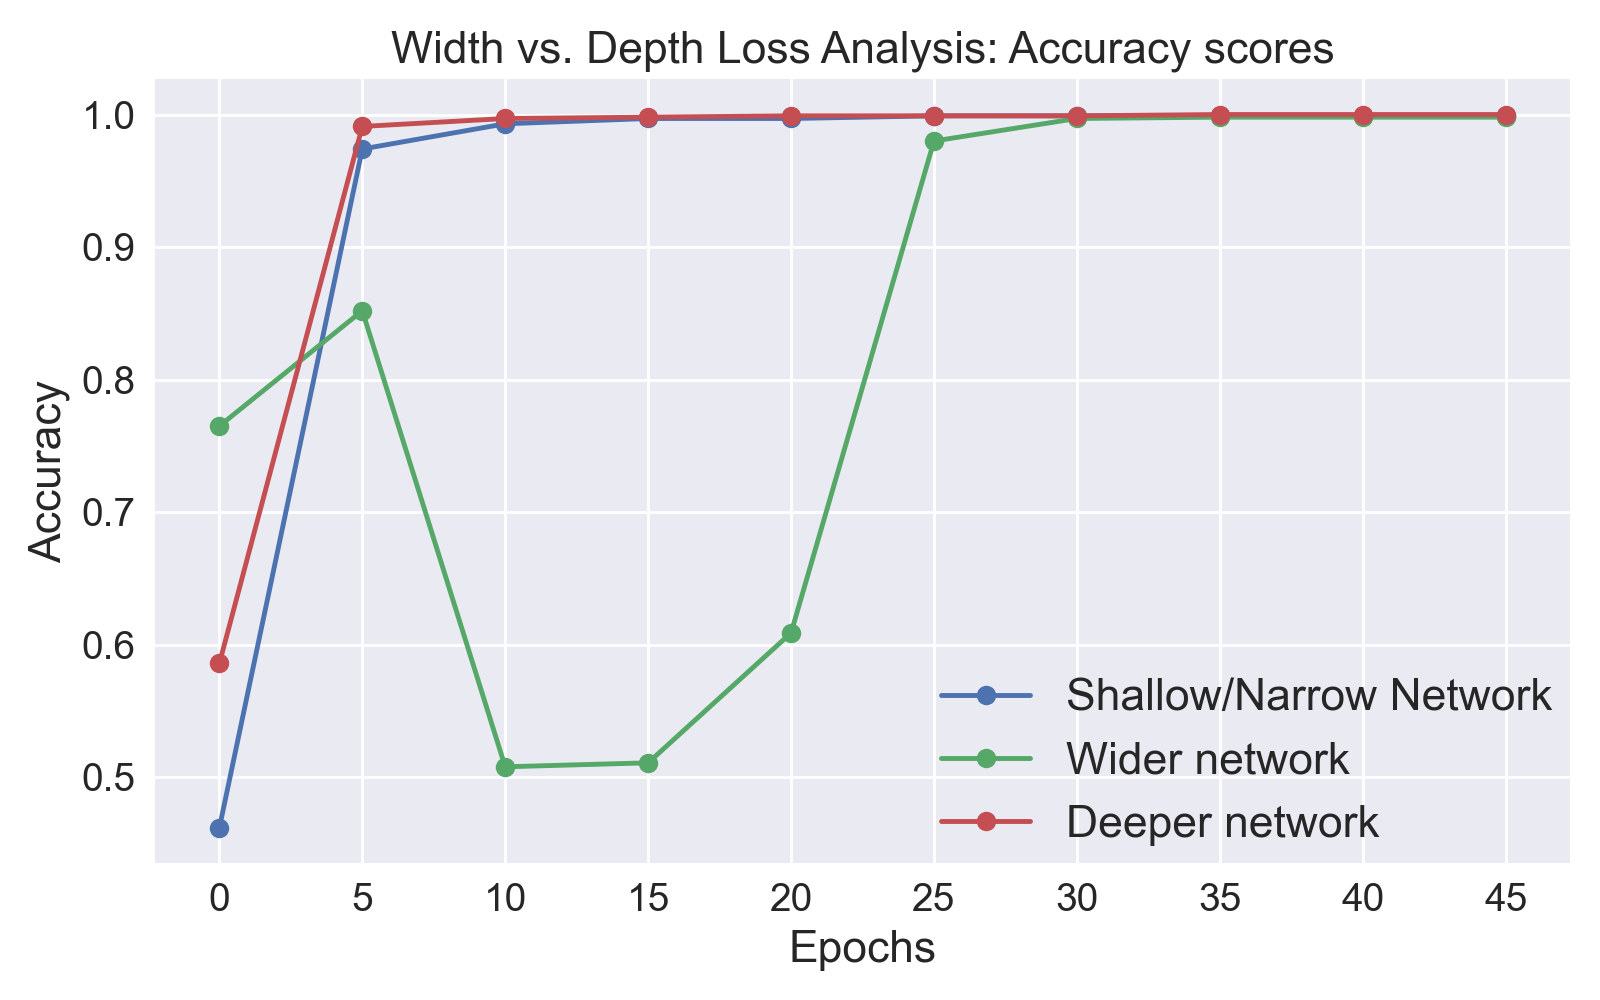

In [210]:
x_list_len = len(acc_list1)
x_list = list(range(x_list_len))

#plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (8, 5))

plt.plot(x_list, acc_list1, "-o", label = "Shallow/Narrow Network")
plt.plot(x_list, acc_list2, "-o", label = "Wider network")
plt.plot(x_list, acc_list3, "-o", label = "Deeper network")

plt.xlabel("Epochs", fontsize = 16)
plt.title("Width vs. Depth Loss Analysis: Accuracy scores", fontsize=16)
plt.ylabel("Accuracy", fontsize = 16)

plt.yticks(fontsize=14)
x_labels = ['0','5','10','15','20', '25', '30', '35', '40', '45']
plt.xticks(range(x_list_len), x_labels,fontsize=14)
#plt.ylim([0, 1.05])

ax.legend(loc="lower right", borderaxespad=0, fontsize=16)

fig.tight_layout()

<IPython.core.display.Javascript object>


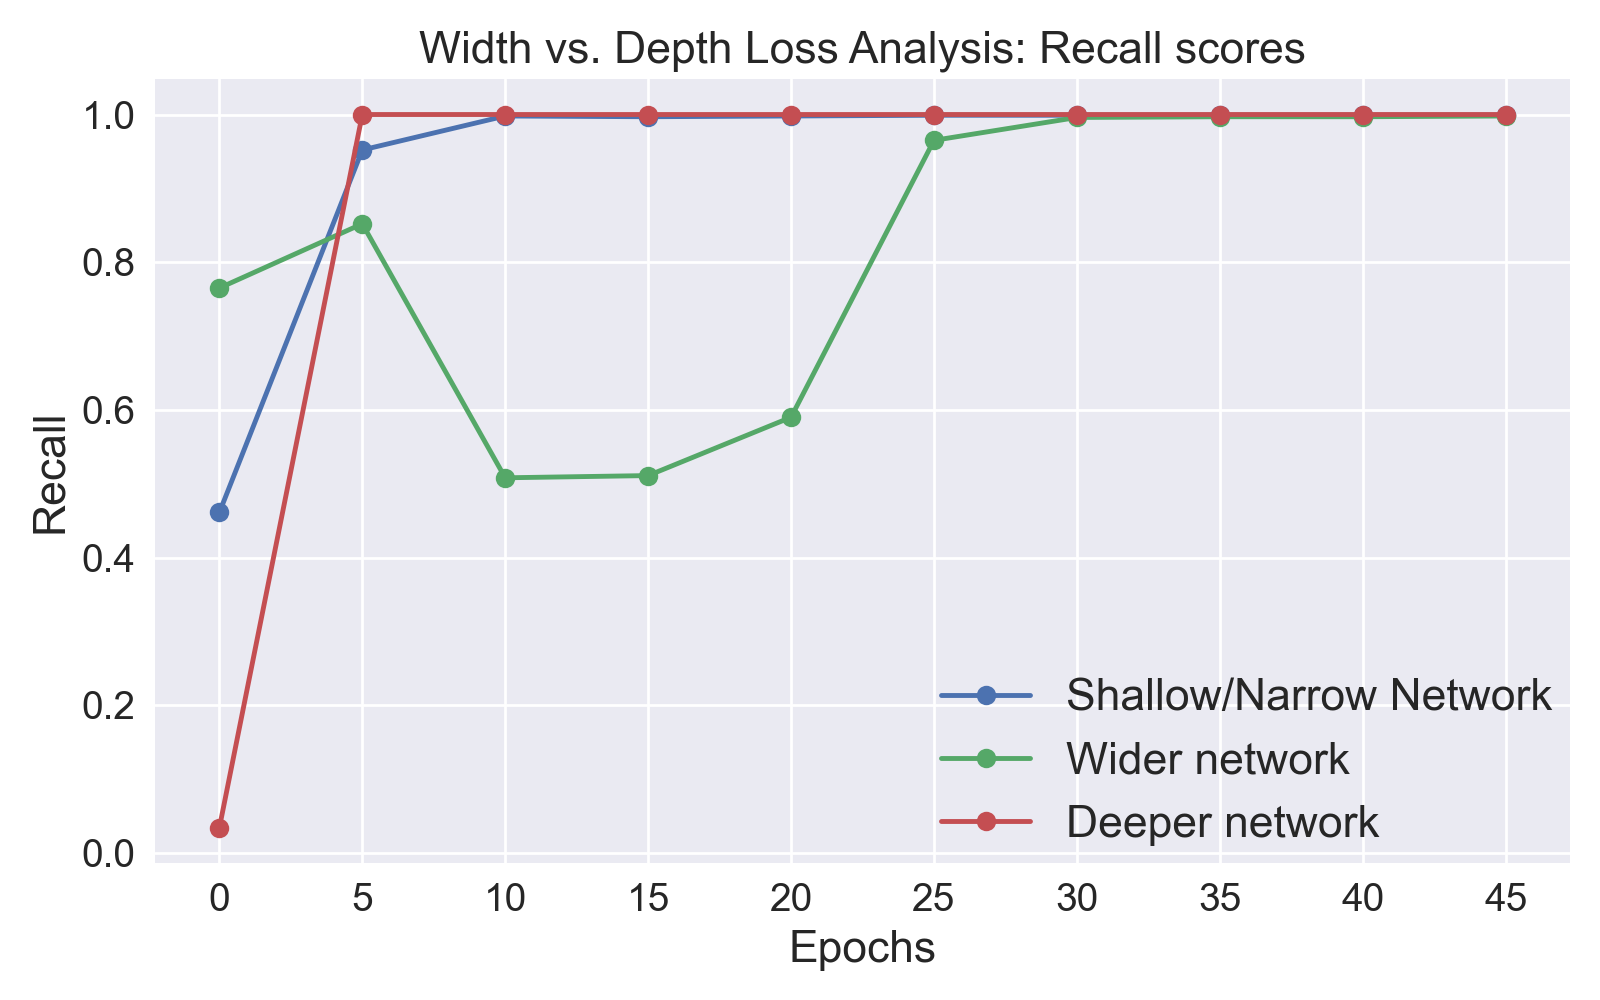

<IPython.core.display.Javascript object>


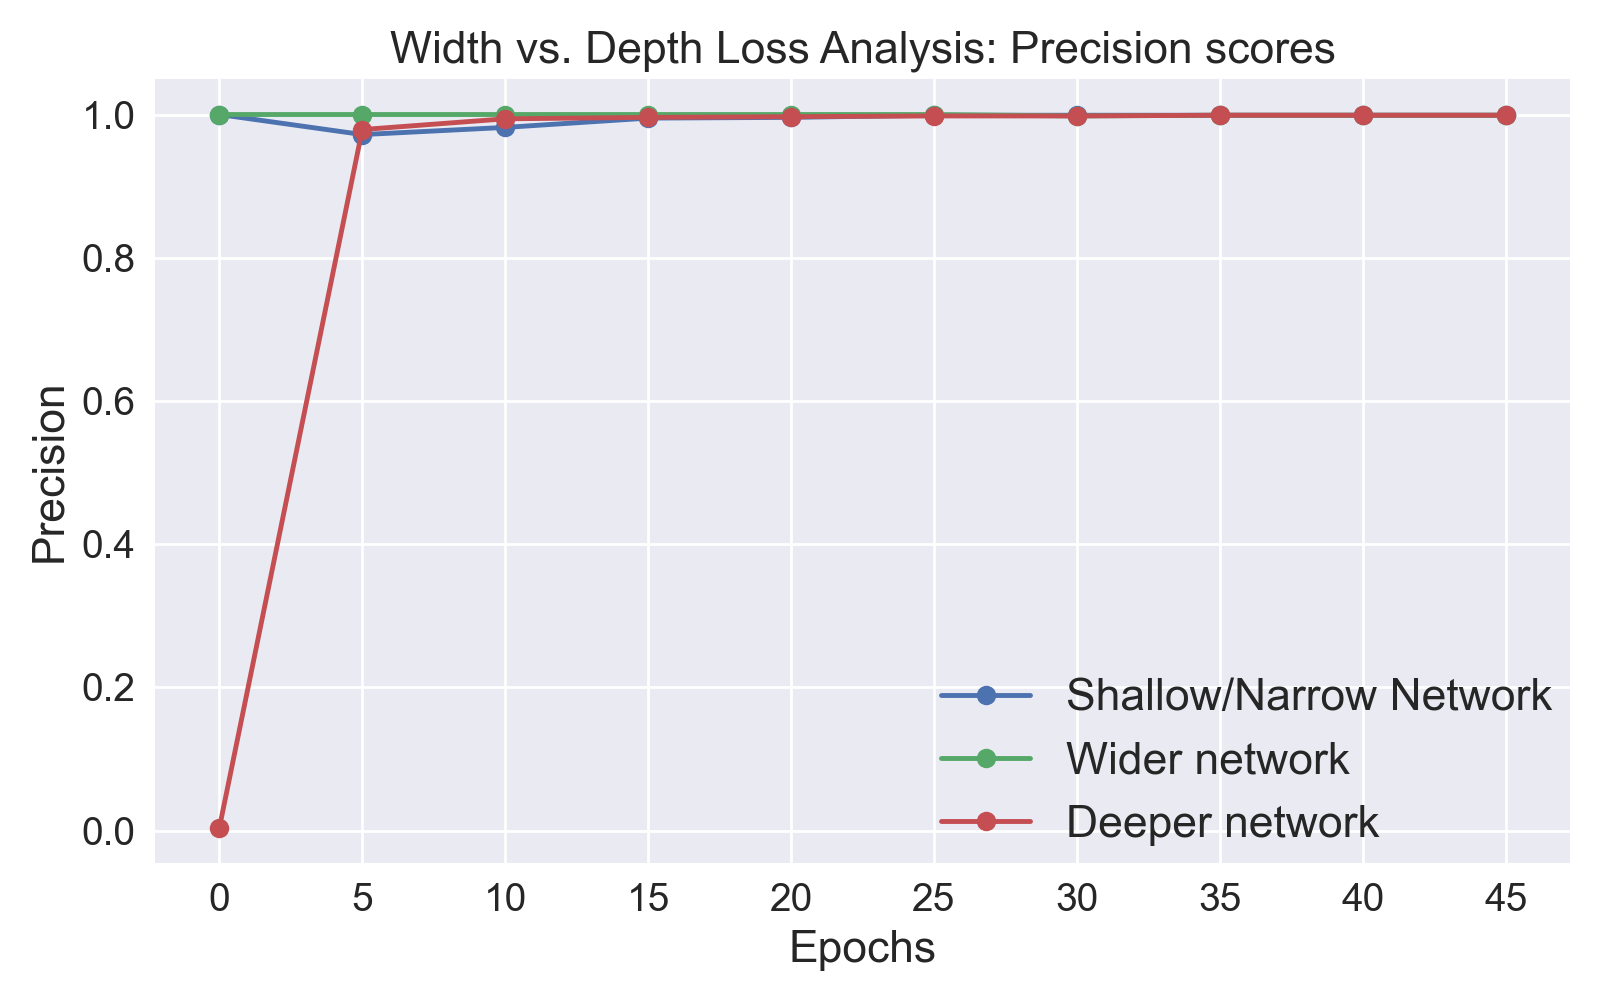

In [212]:
x_list_len = len(recall_list1)
x_list = list(range(x_list_len))

#plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (8, 5))

plt.plot(x_list, prec_list1, "-o", label = "Shallow/Narrow Network")
plt.plot(x_list, prec_list2, "-o", label = "Wider network")
plt.plot(x_list, prec_list3, "-o", label = "Deeper network")

plt.xlabel("Epochs", fontsize = 16)
plt.title("Width vs. Depth Loss Analysis: Precision scores", fontsize=16)
plt.ylabel("Precision", fontsize = 16)

x_labels = ['0','5','10','15','20', '25', '30', '35', '40', '45']
plt.xticks(range(x_list_len), x_labels,fontsize=14)
plt.yticks(fontsize=14)

#plt.ylim([0, 1.05])

ax.legend(loc="lower right", borderaxespad=0, fontsize=16)

fig.tight_layout()

---------  -----
F1 Score   0.995
Accuracy   0.983
Recall     0.998
Precision  0.965
---------  -----


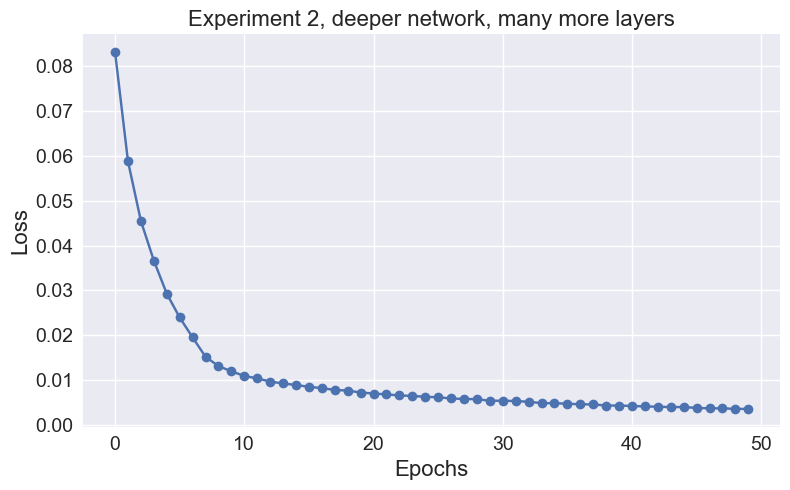

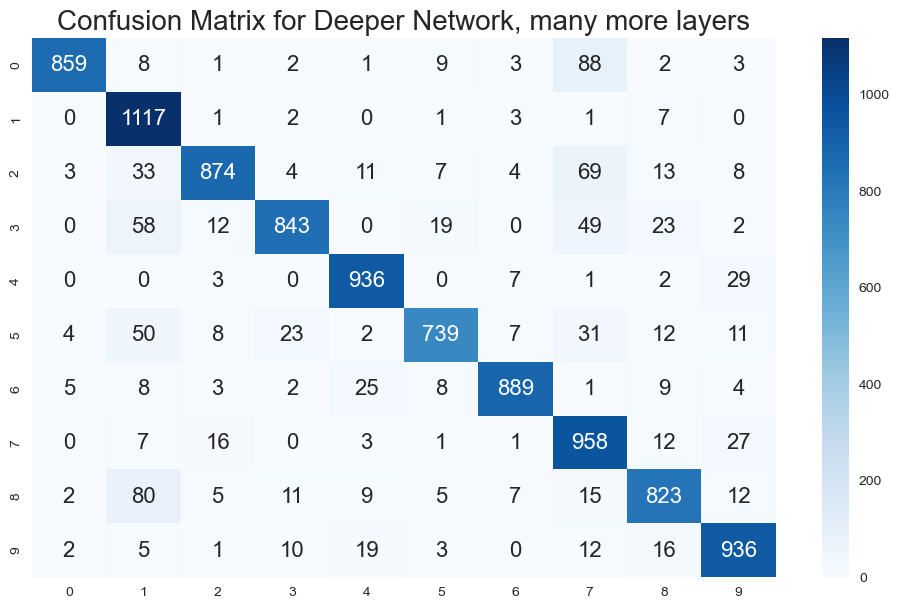

In [313]:
# tweaks to experiment 2:

path = f"/Users/andyvarner/Documents/NN_Spring2023/project_1/results/{which_network}/{which_dataset}"
filename = os.path.join(path,"02a.pkl")
results_2a = pickle.load(open(filename,"rb"))

loss_2a = results_2a["loss"]
cf_mat_2a = results_2a["validation"]

# plot loss across experiment
plot_metric(loss_2a, "Loss", "Experiment 2, deeper network, many more layers")

# plot a confusion matrix for a single epoch

#plot_cfmat(cf_mat_3[-1], 10, "Last validation test")

# aggregate confusion matrices across entire experiment

agg_matrix_2a = agg_matrix_fn(cf_mat_2a)
plot_cfmat(agg_matrix_2a,agg_matrix_2a.shape[0], "Confusion Matrix for Deeper Network, many more layers")

# get other metrics

headers = ['Metric', 'Score']
data = [
    ["F1 Score", f1_score(agg_matrix_2a).round(3)],
    ["Accuracy", accuracy_score(agg_matrix_3).round(3)],
    ["Recall", recall_score(agg_matrix_3).round(3)],
    ["Precision", precision_score(agg_matrix_3).round(3)]
]
print(tabulate(data, tablefmt="simple"))


x_list_len = len(recall_list1)
x_list = list(range(x_list_len))

#plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (8, 5))

plt.plot(x_list, prec_list1, "-o", label = "Shallow/Narrow Network")
plt.plot(x_list, prec_list2, "-o", label = "Wider network")
plt.plot(x_list, prec_list3, "-o", label = "Deeper network")

plt.xlabel("Epochs", fontsize = 16)
plt.title("Width vs. Depth Loss Analysis: Precision scores", fontsize=16)
plt.ylabel("Precision", fontsize = 16)

x_labels = ['0','5','10','15','20', '25', '30', '35', '40', '45']
plt.xticks(range(x_list_len), x_labels,fontsize=14)
plt.yticks(fontsize=14)

#plt.ylim([0, 1.05])

ax.legend(loc="lower right", borderaxespad=0, fontsize=16)

fig.tight_layout()

In [ ]:
# Fashion mnist

---------  -----
F1 Score   0.999
Accuracy   0.999
Recall     0.999
Precision  0.999
---------  -----


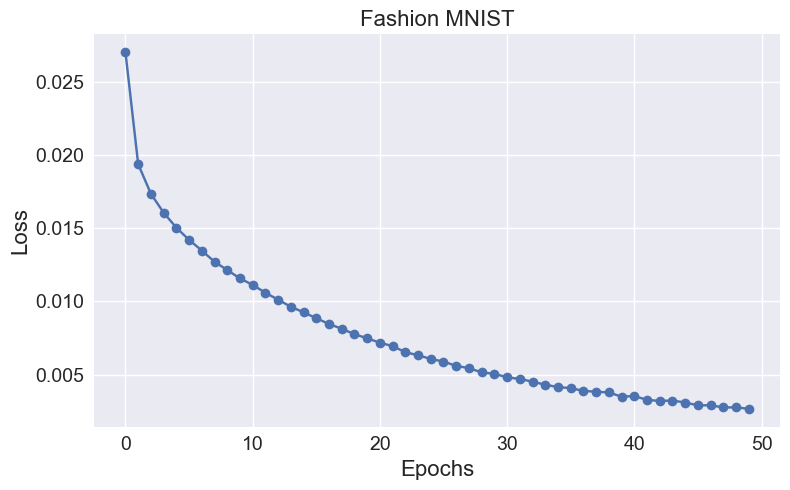

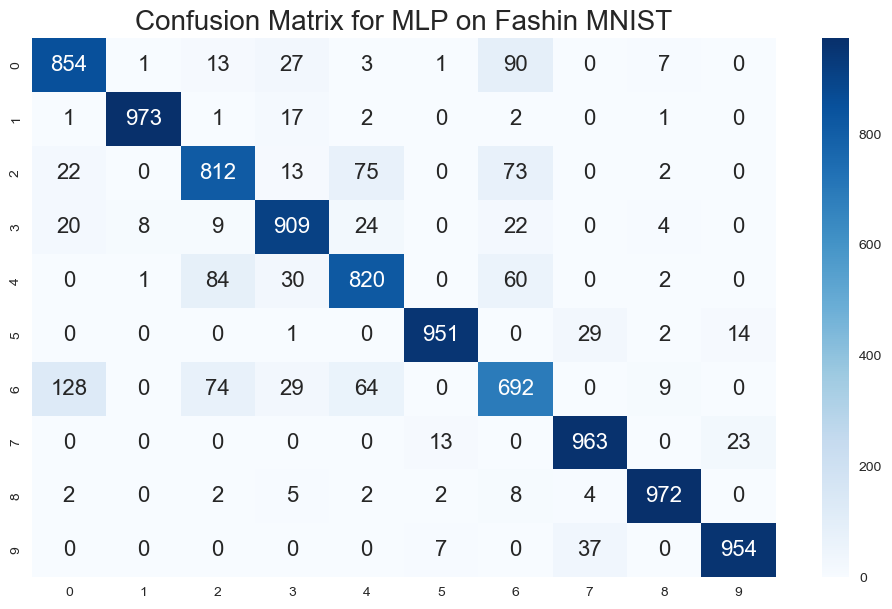

In [315]:
which_dataset = "fashion"

path = f"/Users/andyvarner/Documents/NN_Spring2023/project_1/results/{which_network}/{which_dataset}"
filename = os.path.join(path,"001.pkl")
results_f = pickle.load(open(filename,"rb"))

loss_f = results_f["loss"]
cf_mat_f = results_f["validation"]

# plot loss across experiment
plot_metric(loss_f, "Loss", "Fashion MNIST")

# plot a confusion matrix for a single epoch

#plot_cfmat(cf_mat_3[-1], 10, "Last validation test")

# aggregate confusion matrices across entire experiment

agg_matrix_f = agg_matrix_fn(cf_mat_f)
plot_cfmat(agg_matrix_f,agg_matrix_f.shape[0], "Confusion Matrix for MLP on Fashin MNIST")

# get other metrics

headers = ['Metric', 'Score']
data = [
    ["F1 Score", f1_score(agg_matrix_f).round(3)],
    ["Accuracy", accuracy_score(agg_matrix_f).round(3)],
    ["Recall", recall_score(agg_matrix_f).round(3)],
    ["Precision", precision_score(agg_matrix_f).round(3)]
]
print(tabulate(data, tablefmt="simple"))

In [312]:
#print(tabulate(['Control', 'Deeper', 'Wider']))

headers = ['Metric', 'Score']
data1 = [
    ["F1 Score", f1_score(agg_matrix_1).round(3)],
    ["Accuracy", accuracy_score(agg_matrix_1).round(3)],
    ["Recall", recall_score(agg_matrix_1).round(3)],
    ["Precision", precision_score(agg_matrix_1).round(3)]
]
table1 = tabulate(data1, headers = headers, tablefmt="simple")

headers = ['Metric', 'Score']
data2 = [
    ["F1 Score", f1_score(agg_matrix_2).round(3)],
    ["Accuracy", accuracy_score(agg_matrix_2).round(3)],
    ["Recall", recall_score(agg_matrix_2).round(3)],
    ["Precision", "{:.3f}".format(precision_score(agg_matrix_2).round(3))]
]
table2 = tabulate(data2, headers=headers, tablefmt="simple", floatfmt=".3f")

headers = ['Metric', 'Score']
data3 = [
    ["F1", f1_score(agg_matrix_3).round(3)],
    ["Accuracy", accuracy_score(agg_matrix_3).round(3)],
    ["Recall", recall_score(agg_matrix_3).round(3)],
    ["Precision", precision_score(agg_matrix_3).round(3)]
]

table3 = tabulate(data3, headers=headers, tablefmt="simple")

table1 = "Shallow Net\t\n" + table1
table2 = "Deeper Net \t\n" + table2
table3 = "Wider Net  \t\n" + table3

rows = zip(table1.split('\n'), table2.split('\n'), table3.split('\n'))
table = '\n'.join(['\t'.join(row) for row in rows])

print(table)

"{:.3f}".format(precision_score(agg_matrix_2).round(3))

Shallow Net		Deeper Net 		Wider Net  	
Metric       Score	Metric       Score	Metric       Score
---------  -------	---------  -------	---------  -------
F1 Score     0.933	F1 Score     0.862	F1           0.981
Accuracy     0.938	Accuracy     0.831	Accuracy     0.983
Recall       0.877	Recall       0.757	Recall       0.998
Precision    0.995	Precision    1.000	Precision    0.965


'1.000'

\begin{tabular}{lr}
\hline
 Metric    &   Score \\
\hline
 F1 Score  &   0.933 \\
 Accuracy  &   0.938 \\
 Recall    &   0.877 \\
 Precision &   0.995 \\
\hline
\end{tabular}
\begin{tabular}{lr}
\hline
 F1 Score  & 0.862 \\
 Accuracy  & 0.831 \\
 Recall    & 0.757 \\
 Precision & 1     \\
\hline
\end{tabular}
\begin{tabular}{lr}
\hline
 Metric    &   Score \\
\hline
 F1        &   0.981 \\
 Accuracy  &   0.983 \\
 Recall    &   0.998 \\
 Precision &   0.965 \\
\hline
\end{tabular}